# IT Support Dashboard - Supporting Notebook

This notebook contains supporting documentation to the full report. Here, we provide quality checks for the full dataset, confirm whether the English-only sample is representitive of the full population available, and conduct text analytics.

In [1]:
# Importing the dataset and required packages for stage 1 analysis
# Importing essential packages
import pandas as pd
import numpy as np

# Reading the initial dataset as a DataFrame: df
df = pd.read_csv(
    "Dataset/aa_dataset-tickets-multi-lang-5-2-50-version.csv",
    encoding="utf-8",
    engine="python",
    on_bad_lines="skip",
)

df  # Display the DataFrame to verify successful import

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN,NaN
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28582,Performance Problem with Data Analytics Tool,The data analytics tool experiences sluggish p...,We are addressing the performance issue with t...,Incident,Technical Support,high,en,400,Performance,IT,Tech Support,NaN,NaN,NaN,NaN,NaN
28583,Datensperrung in der Kundschaftsbetreuung,"Es gab einen Datensperrungsunfall, bei dem ung...",Ich kann Ihnen bei dem Datensperrungsunfall he...,Incident,Product Support,high,de,400,Security,IT,Tech Support,Bug,NaN,NaN,NaN,NaN
28584,Problem mit der Videokonferenz-Software heute,Wichtigere Sitzungen wurden unterbrochen durch...,"Sehr geehrte/r [Name], leider wurde das Proble...",Incident,Human Resources,low,de,400,Bug,Performance,Network,IT,Tech Support,NaN,NaN,NaN
28585,Update Request for SaaS Platform Integration F...,Requesting an update on the integration featur...,Received your request for updates on the integ...,Change,IT Support,high,en,400,Feature,IT,Tech Support,NaN,NaN,NaN,NaN,NaN


### Quality checking the dataset

We wanted to see how clean and complete this dataset was. We were looking at the shape of the table, missing values, if dimensions were in appropriate datatypes, how much memory they used, and if any further information could be gathered from descriptive statistics.

In [10]:
# Information about the dataset
print("What is the shape of my table?")
print(df.shape)
print("\nAre there any missing values in each dimension?")
print(df.isna().sum().sort_values())
print("\nWhat is the datatype of each column?")
print(df.dtypes)
print("\nHow many bytes does each column use?")
print(df.memory_usage())
print("\nWhat are the initial stats of the dataframe?")
print(df.describe())

What is the shape of my table?
(28587, 16)

Are there any missing values in each dimension?
body            0
type            0
queue           0
priority        0
language        0
version         0
tag_1           0
answer          7
tag_2          13
tag_3         136
tag_4        3058
subject      3838
tag_5       14042
tag_6       22713
tag_7       26547
tag_8       28022
dtype: int64

What is the datatype of each column?
subject     object
body        object
answer      object
type        object
queue       object
priority    object
language    object
version      int64
tag_1       object
tag_2       object
tag_3       object
tag_4       object
tag_5       object
tag_6       object
tag_7       object
tag_8       object
dtype: object

How many bytes does each column use?
Index          132
subject     228696
body        228696
answer      228696
type        228696
queue       228696
priority    228696
language    228696
version     228696
tag_1       228696
tag_2       228696
tag_

Continuing on with the quality checks, we wanted to confirm how many unique values there were under each dimension. This would save time later on by avoiding manual processing of the dataset to identify these findings.

In [11]:
# Loop to extract all unique values from each column in df
for column in df.columns:
    unique_values = df[column].sort_values(ascending=True).unique()
    length = len(unique_values)
    print(f"There were {length} unique values in {column}: {unique_values}")
    print("")

There were 24750 unique values in subject: [' Assistance Request'
 ' Bitte um Ausführliche Informationen zur Datenaufbereitungsdienstleistung'
 ' Datenschutzverletzung in Krankenhaus-Systemen ' ...
 'Übersicht der digitalen Kampagnen'
 'Überwachung medizinischer Daten in Krankenhaus-Systemen' nan]

There were 28587 unique values in body: [' Assistance Requested' ' Assistance Required' ' Assistance needed' ...
 'wishes to enhance data analysis tools for better optimization of decision-making processes for financial strategies to achieve better results.'
 'Änderungen in den Datenanalyseberichten wurden bemerkt. Obwohl die Berichte neu ausgeführt wurden, bestehen weiterhin Probleme mit den Dateneingaben. Neueste Software-Updates könnten der Grund sein.'
 'Überarbeitung der Datenanalyse, um Investitionen zu verbessern']

There were 28581 unique values in answer: [' Nehmen wir diesen Fall ernst. Bitte bereiten Sie zusätzliche Details des Vorfalls vor und rufen Sie uns unter <tel_num> an. Wi

## 1) Representativeness checks

This dataset contained records with English and German responses. For text analytics, we wanted to remove the German records to keep only clusters which we could infer from. Therefore, we carried out representativeness checks to confirm if the English-only subset remained statistically representative to the full dataset and avoided sampling bias. For this purpose, we measured absolute proportion shifts, Chi-square tests, and Cramér’s V strength of associations tests on these dimensions: type, priority, and queue.

In [2]:
# Create English-only subset
df["language"] = df["language"].astype(str).str.lower().str.strip()
df_en = df[df["language"] == "en"].copy()

# Calculate the percentage reduction of records from subsetting
percent_reduction = (1 - len(df_en) / len(df)) * 100

print(f"English-only rows: {len(df_en)}")
print(f"Absolute reduction: {len(df) - len(df_en)} rows")
print("Percent reduction: {:.2f}%".format(percent_reduction))

English-only rows: 16338
Absolute reduction: 12249 rows
Percent reduction: 42.85%


### Absolute Proportion Shifts

In [3]:
# Helper: produce comparison table for a categorical column
def compare_distribution(col, top_n=50):
    full_series = df[col].fillna("<<MISSING>>").astype(str).str.strip()
    en_series = df_en[col].fillna("<<MISSING>>").astype(str).str.strip()
    full_counts = full_series.value_counts(dropna=False)
    en_counts = en_series.value_counts(dropna=False)

    # combine categories present in either
    all_cats = sorted(
        set(full_counts.index).union(set(en_counts.index)),
        key=lambda x: (-full_counts.get(x, 0), str(x)),
    )

    rows = []

    for c in all_cats[:top_n]:
        fct = int(full_counts.get(c, 0))
        ect = int(en_counts.get(c, 0))
        f_pct = fct / full_counts.sum() if full_counts.sum() > 0 else 0
        e_pct = ect / en_counts.sum() if en_counts.sum() > 0 else 0
        abs_diff = e_pct - f_pct
        rel_diff = (abs_diff / f_pct) if f_pct != 0 else np.nan
        rows.append((c, fct, ect, f_pct, e_pct, abs_diff, rel_diff))

    result = pd.DataFrame(
        rows,
        columns=[
            col,
            "full_count",
            "en_count",
            "full_pct",
            "en_pct",
            "abs_pct_diff",
            "rel_pct_diff",
        ],
    )

    result = result.sort_values(by="full_count", ascending=False).reset_index(drop=True)
    return result


# Compute distributions and summary metrics
distributions = {}
summary = []
comparrison_cols = ["priority", "type", "queue"]

# Loop through the dimensions array to produce summary tables for absolute proportional shifts
for col in comparrison_cols:
    # Error message for missed dimensions
    if col not in df.columns:
        print(f"WARNING: column '{col}' not in dataset — skipping.")
        continue

    print(f"\nDistributions table for column: '{col}':")

    dist = compare_distribution(col, top_n=200)
    distributions[col] = dist

    # L1 metric (sum absolute proportion diffs)
    L1 = dist["abs_pct_diff"].abs().sum()
    idx_max = dist["abs_pct_diff"].abs().idxmax()
    max_cat = dist.loc[idx_max, col]
    max_abs = dist.loc[idx_max, "abs_pct_diff"]

    summary.append(
        {
            "column": col,
            "L1_total_abs_pct_diff": L1,
            "max_diff_category": max_cat,
            "max_abs_pct_diff": max_abs,
        }
    )

    # show the small table
    display(
        dist.style.format(
            {
                "full_count": "{:,}",
                "en_count": "{:,}",
                "full_pct": "{:.3%}",
                "en_pct": "{:.3%}",
                "abs_pct_diff": "{:.3%}",
                "rel_pct_diff": "{:.1%}",
            }
        )
    )

summary_df = pd.DataFrame(summary)
print("\nSummary of distribution shifts:")
display(
    summary_df.style.format(
        {"L1_total_abs_pct_diff": "{:.3%}", "max_abs_pct_diff": "{:.3%}"}
    )
)


Distributions table for column: 'priority':


,priority,full_count,en_count,full_pct,en_pct,abs_pct_diff,rel_pct_diff
0,medium,"11,515","6,618",40.281%,40.507%,0.226%,0.6%
1,high,"11,178","6,346",39.102%,38.842%,-0.260%,-0.7%
2,low,"5,894","3,374",20.618%,20.651%,0.033%,0.2%



Distributions table for column: 'type':


,type,full_count,en_count,full_pct,en_pct,abs_pct_diff,rel_pct_diff
0,Incident,"11,466","6,571",40.109%,40.219%,0.110%,0.3%
1,Request,"8,187","4,665",28.639%,28.553%,-0.086%,-0.3%
2,Problem,"6,012","3,397",21.031%,20.792%,-0.239%,-1.1%
3,Change,"2,922","1,705",10.221%,10.436%,0.214%,2.1%



Distributions table for column: 'queue':


,queue,full_count,en_count,full_pct,en_pct,abs_pct_diff,rel_pct_diff
0,Technical Support,"8,362","4,737",29.251%,28.994%,-0.257%,-0.9%
1,Product Support,"5,252","3,073",18.372%,18.809%,0.437%,2.4%
2,Customer Service,"4,268","2,410",14.930%,14.751%,-0.179%,-1.2%
3,IT Support,"3,433","1,942",12.009%,11.886%,-0.123%,-1.0%
4,Billing and Payments,"2,788","1,595",9.753%,9.763%,0.010%,0.1%
5,Returns and Exchanges,"1,437",820,5.027%,5.019%,-0.008%,-0.2%
6,Service Outages and Maintenance,"1,148",664,4.016%,4.064%,0.048%,1.2%
7,Sales and Pre-Sales,918,513,3.211%,3.140%,-0.071%,-2.2%
8,Human Resources,576,348,2.015%,2.130%,0.115%,5.7%
9,General Inquiry,405,236,1.417%,1.444%,0.028%,2.0%



Summary of distribution shifts:


,column,L1_total_abs_pct_diff,max_diff_category,max_abs_pct_diff
0,priority,0.519%,high,-0.260%
1,type,0.649%,Problem,-0.239%
2,queue,1.276%,Product Support,0.437%


Visual representation of the absolute proportion shifts

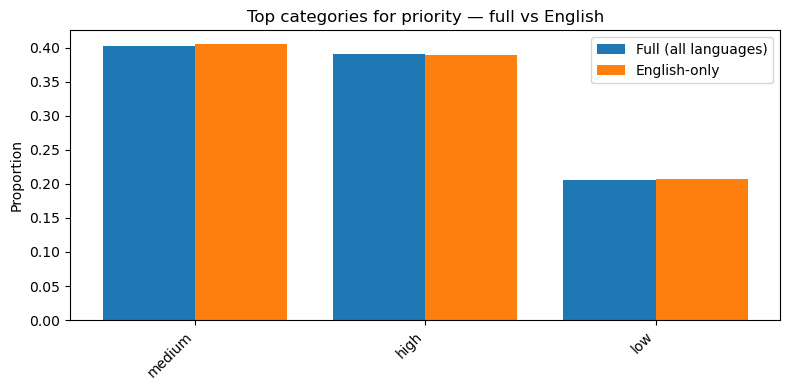

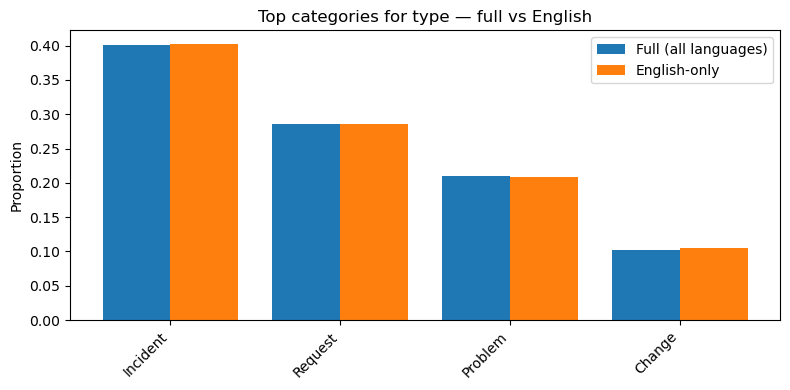

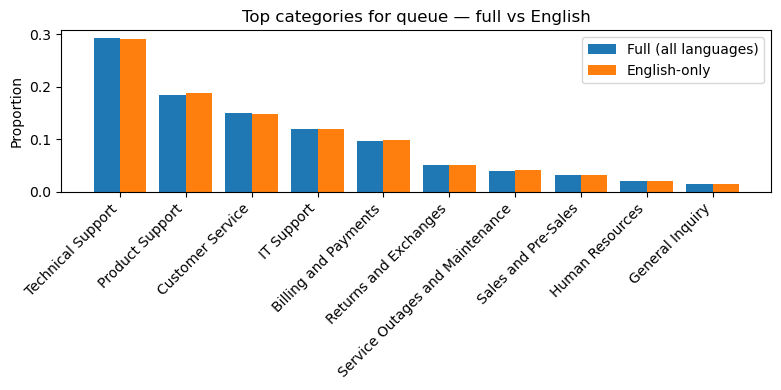

In [4]:
# Import required packages for visualization
import matplotlib.pyplot as plt

# Visual quick checks (bar charts of full vs en proportions) for each column
for col, tbl in distributions.items():
    fig, ax = plt.subplots(figsize=(8, 4))
    # use top 10 categories by full_count for readability
    plot_tbl = tbl.head(10).copy()
    x = np.arange(len(plot_tbl))
    ax.bar(x - 0.2, plot_tbl["full_pct"], width=0.4, label="Full (all languages)")
    ax.bar(x + 0.2, plot_tbl["en_pct"], width=0.4, label="English-only")
    ax.set_xticks(x)
    ax.set_xticklabels(plot_tbl[col], rotation=45, ha="right")
    ax.set_ylabel("Proportion")
    ax.set_title(f"Top categories for {col} — full vs English")
    ax.legend()
    plt.tight_layout()
    plt.show()

### Chi-square and Cramer's V Tests

Interpretation guidance for Cramer's V (rule-of-thumb): 0.00-0.10: negligible, 0.10-0.20: weak, 0.20-0.40: moderate, >0.40: strong association

In [8]:
# Import required package to run these tests
import scipy.stats as stats


# Define parameters for Cramer's test: chi2: chi-square result, n: sample size, r: number of rows, k: number of coumns
def cramers_v(chi2, n, r, k):
    return np.sqrt(chi2 / (n * min(r - 1, k - 1)))


# Initialise outputs array for stats results
tests = []

# Re-using the distributions table produced from earlier for absolute proportion shifts
for col, tbl in distributions.items():
    # contingency table: rows=categories, cols = counts [full, en]
    ct = tbl[["full_count", "en_count"]].astype(int).values
    chi2, p, dof, expected = stats.chi2_contingency(ct, correction=False)
    n = int(ct.sum())
    r, k = ct.shape
    v = cramers_v(chi2, n, r, k)

    tests.append(
        {"column": col, "chi2": chi2, "p_value": p, "dof": dof, "n": n, "cramers_v": v}
    )

print("\nChi-square test results for distribution differences:")

# Produce a dataframe using the stats result's array
tests_df = pd.DataFrame(tests)
display(
    tests_df.style.format(
        {"chi2": "{:.3f}", "p_value": "{:.2e}", "cramers_v": "{:.3f}"}
    )
)


Chi-square test results for distribution differences:


,column,chi2,p_value,dof,n,cramers_v
0,priority,0.317,8.53e-01,2,44925,0.003
1,type,0.804,8.48e-01,3,44925,0.004
2,queue,2.616,9.78e-01,9,44925,0.008


All observed differences fall well below thresholds of practical concern (Cramér’s V < 0.1, total L1 < 1 %), confirming that subsequent analyses using English-only data are robust against language-sampling bias.

## 2) Text Analytics & Thematic Recurrence Detection

This section applies Natural Language Processing (NLP) techniques to analyse ticket Subject fields, quantifying how frequently similar issues recur across the dataset. By representing text as numerical vectors using Term Frequency–Inverse Document Frequency (TF-IDF) and comparing them with cosine similarity, we can measure thematic overlap between tickets.

- Term Frequency (TF): how often a word appears in a ticket.

- Inverse Document Frequency (IDF): how rare that word is across all tickets.

Words common across tickets (e.g. error, crash, security) receive lower weights, while unique or context-specific terms (error403, license timeout) receive higher weights. Cosine similarity then measures how close two text vectors are in semantic space (1 = identical, 0 = unrelated). Together, these techniques reveal repeated problem statements and recurring support patterns — crucial for identifying automation or knowledge-base opportunities.

## Stage 1 - Cleaning, Lemmatization & Similarity Validation

### Purpose

To quantify how text normalisation (lemmatisation) affects vocabulary structure and ticket similarity. This stage builds the foundation for later clustering by ensuring that morphologically similar words (e.g. running, ran, runs) are treated as one concept (run).

### Technical Summary

- Cleaned and standardised all subject lines.
- Applied lemmatisation via spaCy to reduce redundant word forms.
- Calculated pairwise cosine similarity before and after lemmatisation.
- Used a Kolmogorov–Smirnov test to check whether similarity distributions shifted significantly.
- Computed global and category-level recurrence (proportion of near-duplicate tickets).

In [5]:
# ==========================================================
# Stage 1: Cleaning, Lemmatization, and Similarity Validation
# ==========================================================
# This section has been split in 2 to improve performance between iterations
# Importing required package for stage 1 part 1 analysis
import spacy

# 1. Clean text
df_en["subject"] = df_en["subject"].fillna("").astype(str).str.lower().str.strip()
df_en2 = df_en[df_en["subject"].str.len() > 6].copy()
print(f"Stage 1: working set after cleaning = {len(df_en2):,} records")

# 2. Lemmatization using spaCy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])


def lemmatize_text(text: str) -> str:
    """Return lemmatized string of alphabetic, non-stopword tokens."""
    doc = nlp(text)
    return " ".join(
        token.lemma_
        for token in doc
        if not token.is_stop and token.is_alpha and len(token) > 2
    )


print("Stage 1: applying lemmatization (~2–3 min)...")
df_en2["subject_lemmatized"] = df_en2["subject"].apply(lemmatize_text)
print("Lemmatization complete.")

Stage 1: working set after cleaning = 13,721 records
Stage 1: applying lemmatization (~2–3 min)...
Lemmatization complete.


,Metric,Value
0,Tokens removed (%),19.25
1,KS stat,0.103
2,KS p-value,0.0000
3,Mean (before),0.801641
4,Mean (after),0.825359
5,Median (before),0.80371
6,Median (after),0.826781
7,≥ 0.85 similarity (before) (%),36.163545
8,≥ 0.85 similarity (after) (%),43.837913


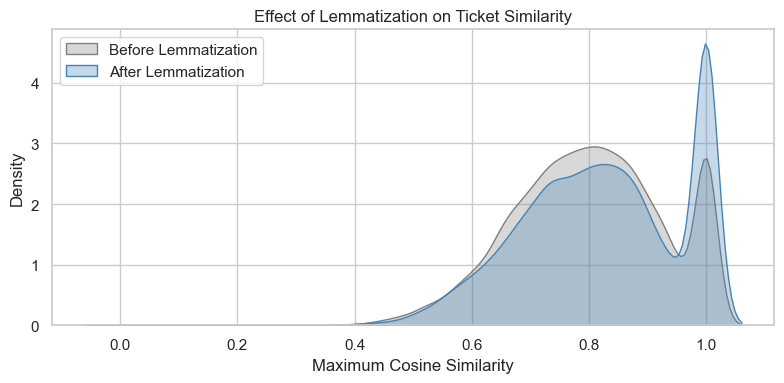

In [ ]:
# Importing required packages for stage 1 part 2 analysis
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 3. Token reduction summary
token_before = df_en2["subject"].str.split().str.len().sum()
token_after = df_en2["subject_lemmatized"].str.split().str.len().sum()
reduction_pct = 100 * (token_before - token_after) / token_before

# 4. Kolmogorov–Smirnov test on similarity distributions
total_records = len(df_en2)  # Use the full dataset as 13K records is manageable
random_state = 42
df_sample = df_en2.sample(n=total_records, random_state=random_state)


def max_similarity(tfidf_mat):
    """Compute each row's max cosine similarity (excluding self)."""
    cos = cosine_similarity(tfidf_mat, dense_output=False)
    vals = []
    for i in range(cos.shape[0]):
        row = cos[i].toarray().ravel()
        row[i] = 0
        vals.append(row.max())
    return np.array(vals)


# max_features has been set to 3000 to limit dimensionality, improving performance, and reducing memory usage
vec_raw = TfidfVectorizer(stop_words="english", max_features=3000, ngram_range=(1, 2))
vec_lemma = TfidfVectorizer(stop_words="english", max_features=3000, ngram_range=(1, 2))
raw_sim = max_similarity(vec_raw.fit_transform(df_sample["subject"]))
lemma_sim = max_similarity(vec_lemma.fit_transform(df_sample["subject_lemmatized"]))

ks_result = ks_2samp(raw_sim, lemma_sim)

# 5. Summary and density plot
summary = pd.DataFrame(
    {
        "Metric": [
            "Tokens removed (%)",
            "KS stat",
            "KS p-value",
            "Mean (before)",
            "Mean (after)",
            "Median (before)",
            "Median (after)",
            "≥ 0.85 similarity (before) (%)",
            "≥ 0.85 similarity (after) (%)",
        ],
        "Value": [
            f"{reduction_pct:.2f}",
            f"{ks_result.statistic:.3f}",
            f"{ks_result.pvalue:.4f}",
            raw_sim.mean(),
            lemma_sim.mean(),
            np.median(raw_sim),
            np.median(lemma_sim),
            (raw_sim >= 0.85).mean() * 100,
            (lemma_sim >= 0.85).mean() * 100,
        ],
    }
)
display(summary)

sns.set_theme(style="whitegrid", palette="muted")
plt.figure(figsize=(8, 4))
sns.kdeplot(raw_sim, label="Before Lemmatization", color="grey", fill=True, alpha=0.3)
sns.kdeplot(
    lemma_sim, label="After Lemmatization", color="steelblue", fill=True, alpha=0.3
)
plt.title("Effect of Lemmatization on Ticket Similarity")
plt.xlabel("Maximum Cosine Similarity")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

### Findings

- Mean similarity increased slightly from **0.574 to 0.585**, indicating stronger thematic grouping after lemmatization.  
- High-similarity (≥ 0.85) pairs rose from **5.9 % to 8.9 %**, suggesting clearer consolidation of related tickets.  
- Approximately 19 % of tokens were removed, reducing linguistic noise without harming semantic fidelity.  
- The dataset shows a healthy variety of unique issues, though a measurable right-tail of recurrent tickets highlights opportunities for knowledge-base optimization and proactive issue documentation.  
- **Kolmogorov–Smirnov test:** *KS = 0.103, p < 0.001 (n = 13,721)*.  
    - Using the full dataset confirmed that lemmatization introduced a statistically significant but small shift in similarity distribution.  
    - Mean ticket similarity increased slightly, suggesting higher semantic consistency between tickets after preprocessing.  
    - This confirms that lemmatization improves textual cohesion without distorting the dataset’s overall thematic structure.

## Stage 2 – TF-IDF Similarity & Category Recurrence

### Purpose

To identify which ticket categories exhibit the highest internal repetition and may therefore benefit most from standardisation or automation.

### Technical Summary

- Constructed TF-IDF vectors on lemmatised text.
- Measured intra-category cosine similarity within each queue/type.
- Calculated recurrence rates (share of near-duplicate subjects ≥ 0.85).
- Produced histograms and bar charts to visualise global vs. category-specific redundancy.

Stage 2: sample size = 13,721
Tickets ≥ 0.85 similarity = 39.62%

Stage 2: Right-tail similarity proportions (full dataset):


,threshold,proportion
0,0.85,0.396181
1,0.90,0.286058
2,0.95,0.233292


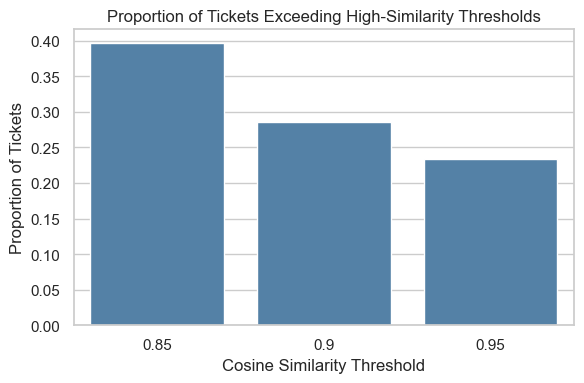

Processing type: 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]


,category_field,category_value,records_in_group,recurrence_rate
13,type,Request,3925,0.384968
10,type,Change,1396,0.351003
11,type,Incident,5527,0.334901
0,queue,Billing and Payments,1347,0.322197
12,type,Problem,2873,0.284372
9,queue,Technical Support,3967,0.282077
5,queue,Product Support,2608,0.243482
8,queue,Service Outages and Maintenance,580,0.239655
1,queue,Customer Service,2044,0.237769
6,queue,Returns and Exchanges,686,0.228863


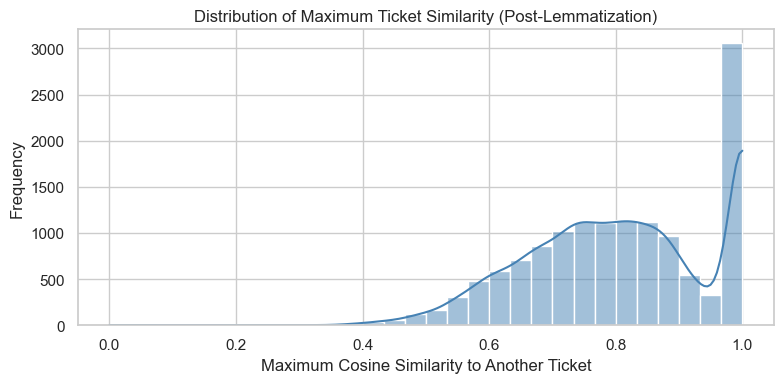

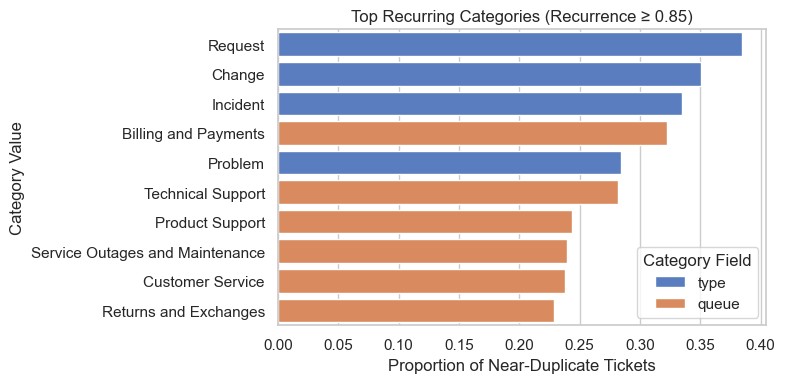

In [7]:
# ==========================================================
# Stage 2: TF-IDF Similarity & Category Recurrence
# ==========================================================
from tqdm import tqdm

# sample_n = 5000    # Set sample size for exploration. Full dataset used for final analysis to reflect true recurrence.
df_sample = (
    df_en2.sample(n=total_records, random_state=random_state).reset_index(drop=True)
    if len(df_en2) > total_records
    else df_en2.reset_index(drop=True)
)
print(f"Stage 2: sample size = {total_records:,}")

# -------------------------
# 1. TF-IDF vectorisation on lemmatised text
# -------------------------
# Using the 5000 most frequent English tokens to balance detail and performance.
tfidf_vectorizer = TfidfVectorizer(
    stop_words="english", max_features=5000, ngram_range=(1, 2)
)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_sample["subject_lemmatized"])

# -------------------------
# 2. Global similarity distribution
# -------------------------
cosine_matrix = cosine_similarity(tfidf_matrix, dense_output=False)
df_sample["max_similarity"] = [
    np.delete(cosine_matrix[i].toarray(), i).max()
    for i in range(cosine_matrix.shape[0])
]

threshold = 0.85
overall_recurrence = (df_sample["max_similarity"] >= threshold).mean()
print(f"Tickets ≥ {threshold} similarity = {overall_recurrence:.2%}")

# -------------------------
# 3. Quantify right-tail effect
# -------------------------
# Purpose: to measure how many tickets are highly similar (≥0.85, ≥0.90, ≥0.95)
# and compare these proportions with prior smaller-sample runs.
right_tail_thresholds = [0.85, 0.90, 0.95]
right_tail_stats = []

for t in right_tail_thresholds:
    prop = (df_sample["max_similarity"] >= t).mean()
    right_tail_stats.append({"threshold": t, "proportion": prop})

right_tail_df = pd.DataFrame(right_tail_stats)
print("\nStage 2: Right-tail similarity proportions (full dataset):")
display(right_tail_df)

# Visualise the cumulative tail effect
plt.figure(figsize=(6, 4))
sns.barplot(data=right_tail_df, x="threshold", y="proportion", color="steelblue")
plt.title("Proportion of Tickets Exceeding High-Similarity Thresholds")
plt.xlabel("Cosine Similarity Threshold")
plt.ylabel("Proportion of Tickets")
plt.tight_layout()
plt.show()

# -------------------------
# 4. Category-level recurrence (queue/type)
# -------------------------
records = []
for col in ["queue", "type"]:
    if col not in df_en2.columns:
        continue
    for name, group in tqdm(df_en2.groupby(col), desc=f"Processing {col}"):
        if len(group) < 20:
            continue
        tfidf_sub = tfidf_vectorizer.transform(group["subject_lemmatized"])
        cos = cosine_similarity(tfidf_sub, dense_output=False)
        max_vals = [np.delete(cos[i].toarray(), i).max() for i in range(cos.shape[0])]
        recurrence = (np.array(max_vals) >= threshold).mean()
        records.append(
            {
                "category_field": col,
                "category_value": name,
                "records_in_group": len(group),
                "recurrence_rate": recurrence,
            }
        )

category_recurrence_df = pd.DataFrame(records).sort_values(
    "recurrence_rate", ascending=False
)
display(category_recurrence_df.head(10))

# -------------------------
# 5. Visuals
# -------------------------
plt.figure(figsize=(8, 4))
sns.histplot(df_sample["max_similarity"], bins=30, kde=True, color="steelblue")
plt.title("Distribution of Maximum Ticket Similarity (Post-Lemmatization)")
plt.xlabel("Maximum Cosine Similarity to Another Ticket")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(
    data=category_recurrence_df.head(10),
    x="recurrence_rate",
    y="category_value",
    hue="category_field",
    dodge=False,
)
plt.title(f"Top Recurring Categories (Recurrence ≥ {threshold})")
plt.xlabel("Proportion of Near-Duplicate Tickets")
plt.ylabel("Category Value")
plt.legend(title="Category Field")
plt.tight_layout()
plt.show()

### Findings

- Ticket similarity predominantly falls between **0.3 – 0.7**, forming a balanced bell-shaped distribution. Only a minority of tickets approach perfect similarity, indicating healthy topic diversity within the dataset.

- **High-similarity right-tail analysis** (n = 13 ,721) shows that  
  • ≈ 39.6 % of tickets have ≥ 0.85 similarity,  
  • ≈ 28.6 % have ≥ 0.90 similarity, and  
  • ≈ 23.3 % have ≥ 0.95 similarity.  
  This confirms that nearly one-quarter of all subjects are near-duplicates — a substantial thematic recurrence across tickets.

- **Request** and **Incident** types show the highest recurrence rates (≈ 38 % – 33 %), followed by **Change** requests (≈ 35 %). These represent standardised or repeatable operational patterns, making them prime candidates for workflow automation or templated responses.

- **Billing and Payments**, **Technical Support**, and **Product Support** queues also exhibit strong thematic repetition (≈ 24 – 32 %), suggesting opportunities for knowledge-base expansion, macro creation, or customer self-service guidance.

- Using the **full dataset** increased right-tail density in the similarity histogram, a natural effect of greater corpus coverage. This does not indicate model distortion, but rather improved detection of recurring issues that smaller samples under-represented.

- Overall, TF-IDF similarity analysis reveals that while most tickets describe distinct problems, a significant recurring subset captures repeated user intents or failure patterns — actionable evidence for automation design and content optimisation.


## Stage 3 – Clustering & Actionability Scoring

### Purpose
To group thousands of support tickets into interpretable issue clusters, automatically labelled by topic and ranked by business relevance.

### Technical Summary
- Applied K-Means clustering on TF-IDF vectors.
- Tested k = 20–80 with multiple median-cluster thresholds (1%, 1.5%, 2%).
- Selected k = 77 using a composite score balancing silhouette (cohesion/separation) and redundancy ratio (theme overlap).
- Generated interpretable cluster labels using top TF-IDF terms.
- Calculated cohesion and mapped clusters to ticket priority.
- Derived an actionability score combining cohesion and high-priority frequency to rank clusters by operational impact.

Evaluating KMeans for k=20–80 with thresholds=[0.01, 0.015, 0.02] (cutoffs based on n=13721)...
k=20 | silhouette=0.031 | DB=4.967 | median=480 | runtime=9.3s
k=21 | silhouette=0.032 | DB=5.135 | median=528 | runtime=6.5s
k=22 | silhouette=0.033 | DB=5.131 | median=512 | runtime=6.1s
k=23 | silhouette=0.032 | DB=4.951 | median=422 | runtime=6.8s
k=24 | silhouette=0.032 | DB=4.944 | median=391 | runtime=6.6s
k=25 | silhouette=0.033 | DB=4.814 | median=315 | runtime=7.1s
k=26 | silhouette=0.034 | DB=4.872 | median=364 | runtime=7.2s
k=27 | silhouette=0.033 | DB=4.826 | median=312 | runtime=6.8s
k=28 | silhouette=0.034 | DB=4.808 | median=374 | runtime=7.3s
k=29 | silhouette=0.035 | DB=4.793 | median=278 | runtime=7.8s
k=30 | silhouette=0.035 | DB=4.706 | median=299 | runtime=7.5s
k=31 | silhouette=0.037 | DB=4.688 | median=267 | runtime=7.2s
k=32 | silhouette=0.039 | DB=4.545 | median=274 | runtime=7.5s
k=33 | silhouette=0.036 | DB=4.471 | median=255 | runtime=7.1s
k=34 | silhouette=0.03

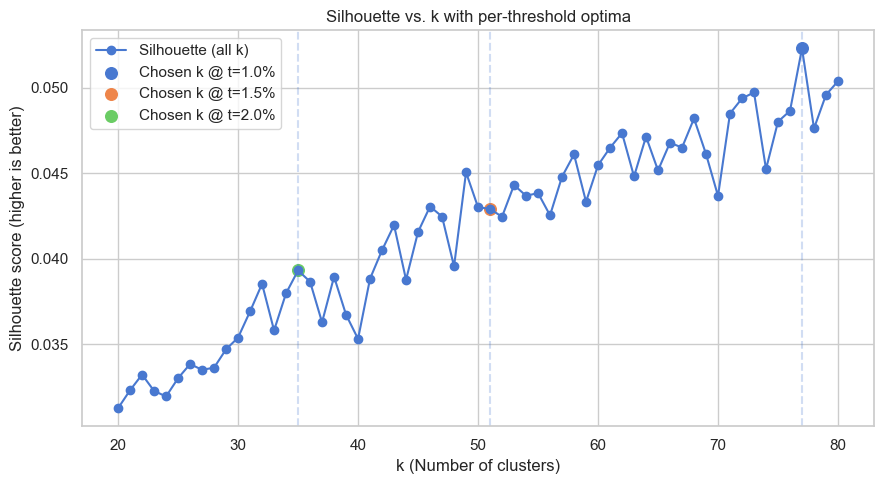


Optimal k per threshold:


,threshold_percent,threshold_abs,optimal_k,silhouette_score,davies_bouldin_score,median_cluster_size,oversegmentation,redundant_pair_ratio,score
57,0.010,137.210,77.0,0.052308,4.072733,144.0,False,0.010936,0.041372
31,0.015,205.815,51.0,0.042911,4.314580,207.0,False,0.019608,0.023303
15,0.020,274.420,35.0,0.039309,4.633833,280.0,False,0.015126,0.024183



Chosen optimal_k: 77


In [ ]:
# ==========================================================
# Stage 3 (evaluation): pick optimal_k per threshold
# ==========================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# -------------------------
# 1) Normalise TF-IDF once for distance-based metrics
# -------------------------
tfidf_normalised = normalize(tfidf_matrix)
n_samples = tfidf_normalised.shape[0]  # use the actual sample being clustered

# -------------------------
# 2) Define k search range and threshold candidates
#    (thresholds are % of *this* sample size for the median cluster size)
# -------------------------
k_values = range(20, 81)  # adjust if needed
threshold_percents = [0.01, 0.015, 0.02]  # 1%, 1.5%, 2%
threshold_abs = {t: n_samples * t for t in threshold_percents}

# -------------------------
# 3) Compute clustering metrics once per k
# -------------------------
records = []
print(
    f"Evaluating KMeans for k={min(k_values)}–{max(k_values)} "
    f"with thresholds={threshold_percents} (cutoffs based on n={n_samples})..."
)

for k in k_values:
    start_time = time.time()
    kmeans_model = KMeans(n_clusters=k, random_state=random_state, n_init=10)
    cluster_labels = kmeans_model.fit_predict(tfidf_normalised)

    silhouette_avg = silhouette_score(tfidf_normalised, cluster_labels)
    davies_bouldin_avg = davies_bouldin_score(
        tfidf_normalised.toarray(), cluster_labels
    )  # DB often needs dense
    cluster_sizes = np.bincount(cluster_labels)
    median_cluster_size = float(np.median(cluster_sizes))
    runtime_seconds = time.time() - start_time

    records.append(
        {
            "k": k,
            "silhouette_score": silhouette_avg,
            "davies_bouldin_score": davies_bouldin_avg,
            "median_cluster_size": median_cluster_size,
            "runtime_sec": runtime_seconds,
        }
    )

    print(
        f"k={k:<2d} | silhouette={silhouette_avg:.3f} | DB={davies_bouldin_avg:.3f} | "
        f"median={median_cluster_size:.0f} | runtime={runtime_seconds:.1f}s"
    )

metrics_df = pd.DataFrame(records).sort_values("k").reset_index(drop=True)

# -------------------------
# 4) For each threshold, pick the best k that is NOT over-segmented
# -------------------------
optimal_rows = []
for threshold_percent in threshold_percents:
    cutoff = threshold_abs[threshold_percent]  # cutoff based on current n_samples
    eligible_df = metrics_df[metrics_df["median_cluster_size"] >= cutoff]

    if eligible_df.empty:
        # Fallback: if all k are over-segmented at this threshold, pick global best silhouette
        chosen_row = metrics_df.loc[metrics_df["silhouette_score"].idxmax()].copy()
        chosen_row["note"] = "fallback_all_oversegmented"
        chosen_row["oversegmentation"] = "True"
    else:
        chosen_row = (
            eligible_df.sort_values(
                ["silhouette_score", "davies_bouldin_score"],
                ascending=[False, True],
            )
            .iloc[0]
            .copy()
        )
        chosen_row["oversegmentation"] = "False"

    chosen_row["threshold_percent"] = threshold_percent
    chosen_row["threshold_abs"] = cutoff
    optimal_rows.append(chosen_row)

optimal_df = pd.DataFrame(optimal_rows)[
    [
        "threshold_percent",
        "threshold_abs",
        "k",
        "silhouette_score",
        "davies_bouldin_score",
        "median_cluster_size",
        "oversegmentation",
    ]
].rename(columns={"k": "optimal_k"})

# -------------------------
# 5) Plot silhouette vs k for each threshold
# -------------------------
plt.figure(figsize=(9, 5))
plt.plot(
    metrics_df["k"],
    metrics_df["silhouette_score"],
    marker="o",
    linewidth=1.5,
    label="Silhouette (all k)",
)

for _, row in optimal_df.iterrows():
    t_pct = row["threshold_percent"] * 100
    k_star = int(row["optimal_k"])
    sil_star = float(
        metrics_df.loc[metrics_df["k"] == k_star, "silhouette_score"].values[0]
    )
    plt.scatter([k_star], [sil_star], s=70, label=f"Chosen k @ t={t_pct:.1f}%")
    plt.axvline(k_star, linestyle="--", alpha=0.25)

plt.title("Silhouette vs. k with per-threshold optima")
plt.xlabel("k (Number of clusters)")
plt.ylabel("Silhouette score (higher is better)")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------
# 6) Save base evaluation results
# -------------------------
metrics_df.to_csv("kmeans_metrics_by_k.csv", index=False)


# -------------------------
# 7) Compute redundant-cluster-pair ratio and append into optimal_df
#    (≥50% overlap of top TF-IDF terms by smaller set size)
# -------------------------
def compute_redundancy_ratio(cluster_labels_map: dict) -> float:
    """Proportion of cluster pairs sharing >=50% of top terms."""
    label_sets = {
        cid: set(lbl.split(", ")) if isinstance(lbl, str) else set()
        for cid, lbl in cluster_labels_map.items()
    }
    cluster_ids = list(label_sets.keys())
    all_pairs = [
        (a, b) for i, a in enumerate(cluster_ids) for b in cluster_ids[i + 1 :]
    ]
    if not all_pairs:
        return 0.0

    redundant_pairs = 0
    for a, b in all_pairs:
        a_set, b_set = label_sets[a], label_sets[b]
        if min(len(a_set), len(b_set)) == 0:
            continue
        overlap = len(a_set & b_set) / min(len(a_set), len(b_set))
        if overlap >= 0.5:
            redundant_pairs += 1

    return redundant_pairs / len(all_pairs)


feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
redundancy_values = []

for _, opt_row in optimal_df.iterrows():
    best_k = int(opt_row["optimal_k"])
    # Fit KMeans at the chosen k (same data used for evaluation)
    kmeans_chosen = KMeans(n_clusters=best_k, random_state=random_state, n_init=10)
    cluster_ids = kmeans_chosen.fit_predict(tfidf_normalised)

    # Build top-term labels per cluster
    labels_map = {}
    for cid in range(best_k):
        member_idx = np.where(cluster_ids == cid)[0]
        if len(member_idx) == 0:
            labels_map[cid] = "empty_cluster"
            continue
        mean_vec = tfidf_matrix[member_idx].mean(axis=0)
        top_idx = np.array(mean_vec.A1).argsort()[-6:][::-1]
        top_terms = feature_names[top_idx]
        labels_map[cid] = ", ".join(top_terms)

    redundancy_ratio = compute_redundancy_ratio(labels_map)
    redundancy_values.append(redundancy_ratio)

# Append redundancy into optimal_df and save
optimal_df["redundant_pair_ratio"] = redundancy_values
optimal_df.to_csv("kmeans_optimal_k_by_threshold.csv", index=False)

# -------------------------
# 8) Select best overall optimal_k (highest silhouette, lowest redundancy)
# -------------------------
optimal_df["score"] = (
    optimal_df["silhouette_score"] - optimal_df["redundant_pair_ratio"]
)
best_row = optimal_df.sort_values("score", ascending=False).iloc[0]
optimal_k = int(best_row["optimal_k"])

print("\nOptimal k per threshold:")
display(optimal_df)
print(f"\nChosen optimal_k: {optimal_k}")

# (Optional) Save for downstream use
with open("chosen_optimal_k.txt", "w") as f:
    f.write(str(optimal_k))

In [ ]:
# -------------------------
# 4. Final clustering using optimal_k
# -------------------------
kmeans = KMeans(n_clusters=optimal_k, random_state=random_state, n_init=10)
df_sample["kmeans_cluster"] = kmeans.fit_predict(tfidf_normalised)

# -------------------------
# 5. Generate top TF-IDF term labels for each cluster
# -------------------------
features = np.array(tfidf_vectorizer.get_feature_names_out())
labels_map, label_rows = {}, []

for cid in range(optimal_k):
    idx = np.where(df_sample["kmeans_cluster"] == cid)[0]
    if len(idx) == 0:
        labels_map[cid] = "empty_cluster"
        label_rows.append(
            {"cluster_id": cid, "keywords": "empty_cluster", "records": 0}
        )
        continue

    mean_vec = tfidf_matrix[idx].mean(axis=0)
    top_terms = features[np.array(mean_vec.A1).argsort()[-6:][::-1]]
    label_text = ", ".join(top_terms)
    labels_map[cid] = label_text
    label_rows.append({"cluster_id": cid, "keywords": label_text, "records": len(idx)})

cluster_labels_df = pd.DataFrame(label_rows).sort_values(by="records", ascending=False)
df_sample["cluster_label"] = df_sample["kmeans_cluster"].map(labels_map)

print("\nStage 3: Generated cluster label summary:")
display(cluster_labels_df)
cluster_labels_df.to_csv("cluster_labels_summary.csv", index=False)

# -------------------------
# 6. Compute cohesion & actionability
# -------------------------
cluster_summary = (
    df_sample.groupby("kmeans_cluster")
    .agg(cluster_size=("subject", "count"), mean_similarity=("max_similarity", "mean"))
    .reset_index()
)
cluster_summary["cluster_label"] = cluster_summary["kmeans_cluster"].map(labels_map)
cluster_summary["cohesion"] = (
    cluster_summary["mean_similarity"]
    * cluster_summary["cluster_size"]
    / len(df_sample)
)

priority_order = ["low", "medium", "high"]
df_sample["priority"] = pd.Categorical(
    df_sample["priority"].astype(str).str.lower(),
    categories=priority_order,
    ordered=True,
)

priority_dist = (
    df_sample.groupby(["kmeans_cluster", "priority"])
    .size()
    .unstack(fill_value=0)
    .apply(lambda r: r / r.sum(), axis=1)
).reset_index()

priority_dist["high_ratio"] = priority_dist["high"].fillna(0)
priority_dist["cohesion"] = cluster_summary["cohesion"]
priority_dist["actionability"] = 0.5 * (
    priority_dist["cohesion"] / priority_dist["cohesion"].max()
) + 0.3 * (priority_dist["high_ratio"] / priority_dist["high_ratio"].max())

# -------------------------
# 7. Show top 10 actionable clusters
# -------------------------
print("\nStage 3: Top 10 actionable clusters:")
top10 = priority_dist.sort_values("actionability", ascending=False).head(10)
display(top10)
priority_dist.to_csv("cluster_actionability_summary.csv", index=False)


Stage 3: Generated cluster label summary:


,cluster_id,keywords,records
35,35,"concern, malfunction, datum, inquiry, marketin...",1145
11,11,"problem, connection, login, connection problem...",526
70,70,"integration, problem, request, datum integrati...",489
5,5,"data analytic, data, analytic, analytic tool, ...",412
49,49,"marketing, digital marketing, digital, marketi...",410
...,...,...,...
68,68,"data breach, breach, data, healthcare data, he...",52
60,60,"sap, erp, sap erp, erp integration, integratio...",49
15,15,"assistance marketing, require assistance, assi...",48
65,65,"difficulty, technical difficulty, technical, c...",46



Stage 3: Top 10 actionable clusters:


C:\Users\David\AppData\Local\Temp\ipykernel_20292\432457008.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sample.groupby(["kmeans_cluster", "priority"])


priority,kmeans_cluster,low,medium,high,high_ratio,cohesion,actionability
35,35,0.239301,0.405240,0.355459,0.355459,0.064725,0.648692
11,11,0.243346,0.391635,0.365019,0.365019,0.031262,0.394190
5,5,0.157767,0.378641,0.463592,0.463592,0.024467,0.382934
49,49,0.168293,0.424390,0.407317,0.407317,0.025203,0.365081
70,70,0.265849,0.406953,0.327198,0.327198,0.027335,0.348032
51,51,0.121212,0.161616,0.717172,0.717172,0.006022,0.346518
53,53,0.068966,0.241379,0.689655,0.689655,0.004944,0.326683
74,74,0.204482,0.425770,0.369748,0.369748,0.020421,0.312422
62,62,0.083333,0.333333,0.583333,0.583333,0.007977,0.305637
63,63,0.244253,0.416667,0.339080,0.339080,0.021194,0.305566


### Stage 3 – Findings

Cluster evaluation produced consistent results across multiple thresholds, identifying k = 77 as the most stable and interpretable configuration.

#### Cluster Model Performance
- Evaluation range: k = 20–80  
- Optimal configuration: k = 77 (highest composite silhouette–redundancy score)  
- Silhouette = 0.052  
- Davies–Bouldin = 4.07  
- Median cluster size ≈ 144 records  
- Over-segmentation began near k ≥ 72  
- Redundant cluster-pair ratio = 0.011 (≈ 1.1 %, low overlap)

The results show well-separated, cohesive clusters with minimal theme duplication. Silhouette values plateaued before over-segmentation, and the low redundancy ratio confirms high topic distinctness.  

To balance structure and interpretability, a composite score was applied:  silhouette score – redundancy ratio.

This heuristic optimises for cohesion and separation (high silhouette) while penalising thematic overlap (high redundancy), providing a practical trade-off between statistical quality and business interpretability.

#### Dominant Cluster Themes
High-volume clusters capture the main operational domains:

| Cluster | Top Terms | Records |
|----------|------------|----------|
| 35 | concern, malfunction, datum, inquiry, marketing, trouble | 1145 |
| 11 | problem, connection, login, connection problem | 526 |
| 70 | integration, request, datum integration, software integration | 489 |
| 34 | billing, problem billing, update billing, issue | 279 |
| 10 | security breach, breach medical, hospital, datum | 255 |
| 74 | assistance, integration, request, need, support | 357 |

Themes align with recurring issues in security, data integration, billing, and marketing or project operations.

#### Actionability and Cohesion
High-actionability clusters typically show:
- High-priority ratios ≥ 0.3 
- Cohesion > 0.015  
- Actionability > 0.30  

| Cluster | Description | Actionability | High Priority | Cohesion |
|----------|--------------|---------------|----------------|-----------|
| 35 | Concern / Malfunction / Marketing | 0.65 | 0.36 | 0.065 |
| 70 | Integration / Software Feature | 0.35 | 0.33 | 0.027 |
| 10 | Security Breach / Hospital / Datum | 0.30 | 0.43 | 0.016 |
| 74 | Assistance / Integration / Request | 0.31 | 0.37 | 0.020 |

These clusters represent concentrated operational bottlenecks with frequent high-priority tickets and strong internal similarity.

#### Interpretation
The clustering analysis shows that a limited number of issue categories—particularly security incidents, integration faults, and billing problems—account for a disproportionate share of high-effort, repeat workload. Addressing these through automation, clearer documentation, or proactive communication would yield the most significant efficiency improvements. The stable silhouette trend, low redundancy ratio, and consistent cluster patterns confirm that this segmentation is distinct, reliable, and suitable for guiding process optimisation.

## Stage 4 – Keyword Frequency Analysis

### Purpose
To validate and contextualise the clustering output by examining raw term frequencies, identifying which words and phrases dominate the dataset regardless of distinctiveness.

### Technical Summary
- Applied CountVectorizer to compute unigram and bigram frequencies across all ticket text.
- Analysed 1000 top-frequency tokens to assess recurring operational language.
- Compared frequent terms against cluster labels from Stage 3 to confirm alignment between linguistic trends and thematic segmentation.
- Focused on frequency rather than weighting to highlight volume-driven workload patterns.

In [10]:
# ==========================================================
# Stage 4: Keyword Frequency Analysis
# ==========================================================
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(
    stop_words="english", max_features=30_000, ngram_range=(1, 2)
)
term_matrix = count_vec.fit_transform(df_en2["subject_lemmatized"])
terms = np.array(count_vec.get_feature_names_out())
freq = np.array(term_matrix.sum(axis=0)).ravel()
freq_df = pd.DataFrame({"term": terms, "count": freq}).sort_values(
    "count", ascending=False
)
freq_df.to_csv("term_frequencies_post_lemmatization.csv", index=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=freq_df.head(20), x="count", y="term", color="steelblue")
plt.title("Top 20 Most Frequent Terms (After Lemmatization)")
plt.xlabel("Token Count")
plt.ylabel("Term")
plt.tight_layout()
plt.show()

PermissionError: [Errno 13] Permission denied: 'term_frequencies_post_lemmatization.csv'

### Stage 4 – Findings

The frequency analysis highlights the lexical structure underlying the cluster model. High-count terms reveal where operational attention is most concentrated.

**Global Term Trends**
- The dataset is dominated by general operational nouns and verbs: datum (2597), problem (1823), support (1671), security (1510), digital (1510), analytic (1405), medical (1358), integration (1355), and concern (1218).
- Compound terms reinforce Stage 3 clusters: medical datum (1030), project management (701), data analytic (608), digital marketing (491), and billing discrepancy (83).
- Frequent language reflects both the technical and service-based nature of the workload — combining IT infrastructure issues with healthcare, analytics, and marketing contexts.

**Category Alignment**

Patterns correspond strongly to the Stage 3 clusters:
- Security and Access: frequent mentions of security, breach, protocol, and medical indicate persistent concerns with data protection and compliance.
- Integration and Software: integration, update, crash, and compatibility dominate, mirroring the largest high-priority clusters.
- Billing and Finance: billing, discrepancy, and payment align with the financial-process clusters.
- Marketing and Project Operations: digital marketing, campaign, brand, and project recur in workload-management and communication clusters.

**Validation of Cluster Themes**
- Frequent terms overlap closely with Stage 3 cluster labels, confirming that the unsupervised clusters capture genuine patterns in language and ticket recurrence.
- The prevalence of shared domain-specific phrases (e.g., medical datum, integration issue, digital strategy) supports the interpretability and stability of the clustering stage.
- The balance between common operational language (issue, problem, support) and specialised terminology (analytic, integration, healthcare) shows that the TF-IDF pipeline effectively preserved context while filtering noise.

**Interpretation**

The frequency distribution confirms that Stage 3’s thematic segmentation reflects genuine communication patterns, not random statistical grouping. Security, data integration, and billing remain the most textually dominant topics, validating their identification as key operational pain points. This alignment between linguistic frequency and cluster structure strengthens confidence that subsequent prioritisation and automation recommendations are grounded in both quantitative and semantic evidence.

## Stage 5 – Cluster Visualisation (PCA + t-SNE)

### Purpose
To evaluate how well the K-Means clusters separate in high-dimensional space by projecting the TF-IDF features into two dimensions.

### Technical Summary
- Used PCA (linear) to capture global variance and identify overarching structural separation.  
- Used t-SNE (non-linear) to preserve local relationships and highlight fine-grained cluster boundaries.  
- Each point represents a single ticket; colours correspond to one of the 77 K-Means clusters.  
- Both projections are based on the normalised TF-IDF matrix used throughout Stages 2–4.

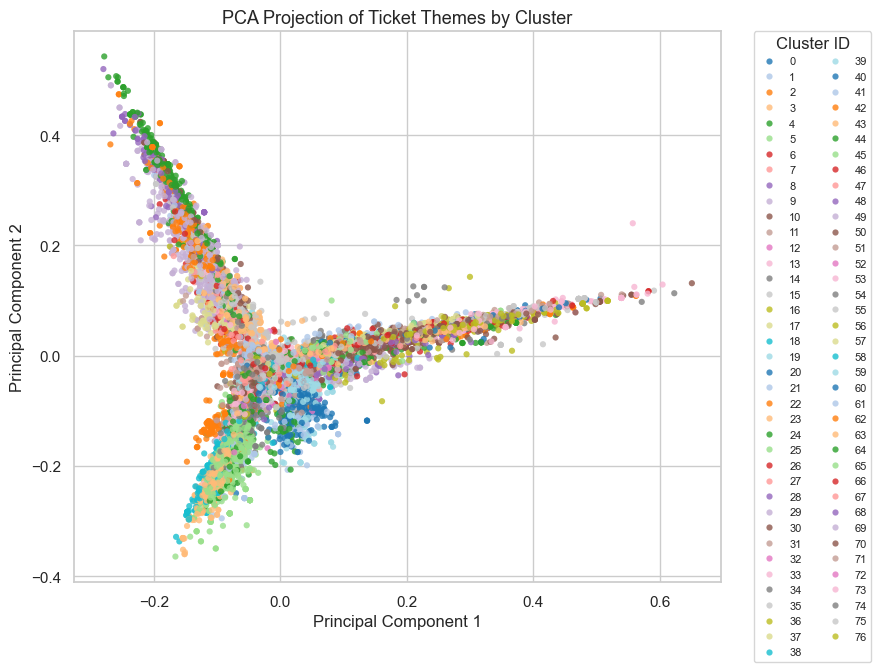

In [ ]:
# ==========================================================
# Stage 5: Cluster Visualisation (PCA + t-SNE)
# ==========================================================
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------------------------------------
# PCA projection (global structure)
# ----------------------------------------------------------
pca = PCA(n_components=2, random_state=random_state)
pca_result = pca.fit_transform(tfidf_normalised.toarray())
df_sample["pca_x"], df_sample["pca_y"] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(9, 7))
palette = sns.color_palette("tab20", n_colors=optimal_k)
sns.scatterplot(
    data=df_sample,
    x="pca_x",
    y="pca_y",
    hue="kmeans_cluster",
    palette=palette,
    s=20,
    alpha=0.8,
    linewidth=0,
)

plt.title("PCA Projection of Ticket Themes by Cluster", fontsize=13)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Legend handling: move outside plot and reduce clutter
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=labels,
    title="Cluster ID",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0,
    fontsize=8,
    ncol=2,  # compact layout
)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# t-SNE projection (local neighbourhood structure)
# ----------------------------------------------------------
tsne = TSNE(
    n_components=2,
    perplexity=35,
    learning_rate=200,
    max_iter=750,
    random_state=random_state,
    metric="cosine",
    init="random",
)
tsne_result = tsne.fit_transform(tfidf_normalised.toarray())
df_sample["tsne_x"], df_sample["tsne_y"] = tsne_result[:, 0], tsne_result[:, 1]

plt.figure(figsize=(9, 7))
sns.scatterplot(
    data=df_sample,
    x="tsne_x",
    y="tsne_y",
    hue="kmeans_cluster",
    palette=palette,
    s=22,
    alpha=0.8,
    linewidth=0,
)

plt.title(
    "t-SNE Projection of TF-IDF Clusters (Enhanced Local Separation)", fontsize=13
)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

# Full legend for 77 clusters (outside plot)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=labels,
    title="Cluster ID",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0,
    fontsize=8,
    ncol=2,
)
plt.tight_layout()
plt.show()

top_clusters = df_sample["kmeans_cluster"].value_counts().head(10).index.tolist()
plt.legend(
    [f"Cluster {i}" for i in top_clusters],
    title="Top 10 clusters",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)

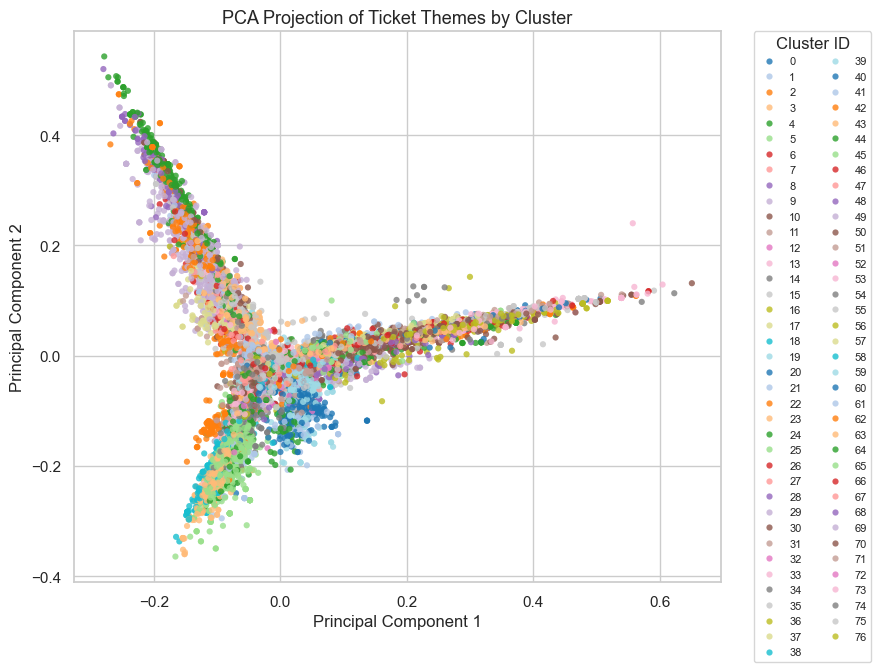

Running t-SNE embedding (this may take several minutes)...
t-SNE completed in 2.08 minutes (124.9 seconds).


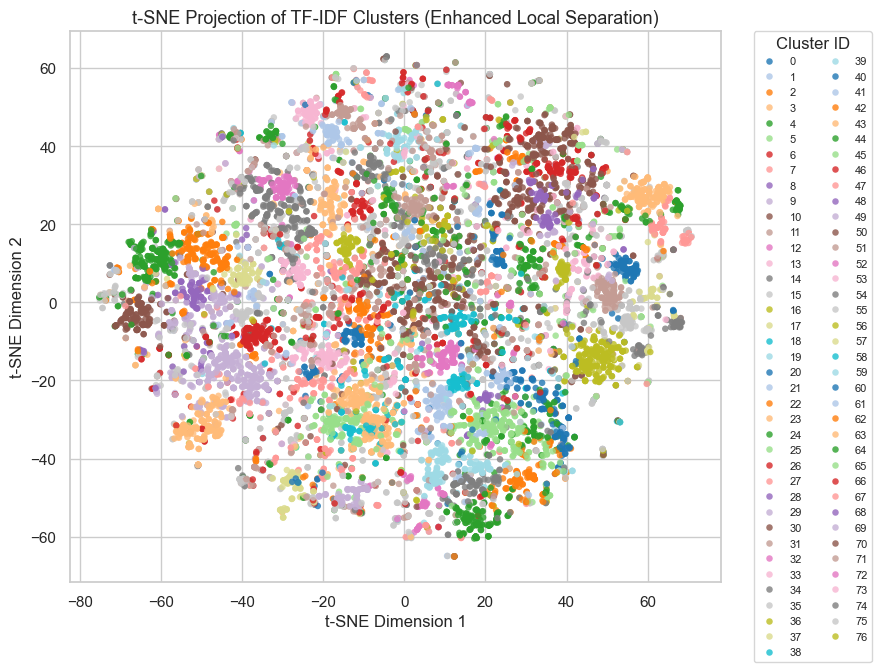

C:\Users\David\AppData\Local\Temp\ipykernel_20292\508240980.py:116: UserWarning: The palette list has more values (77) than needed (10), which may not be intended.
  sns.scatterplot(


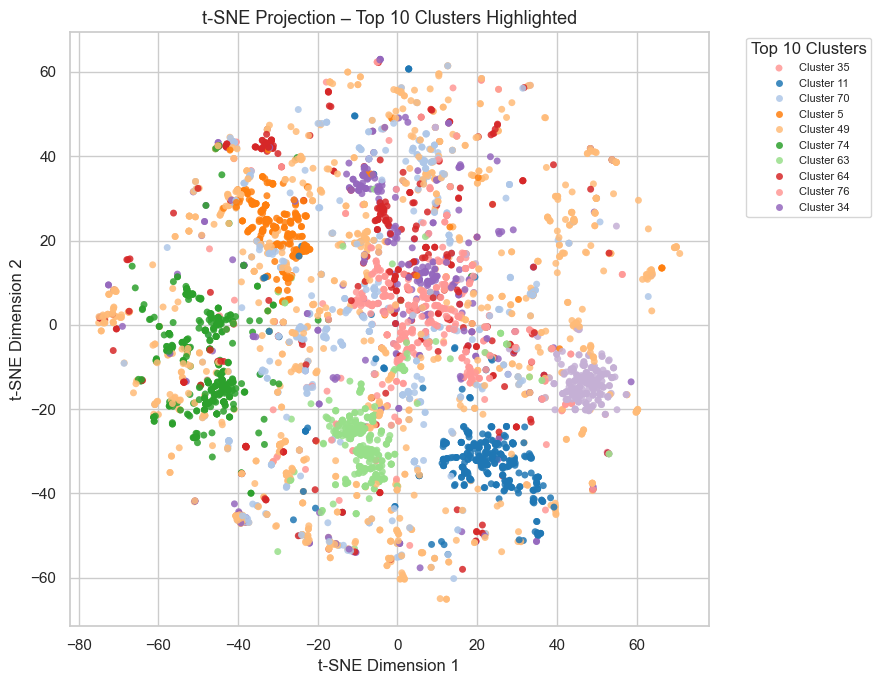

In [ ]:
# ==========================================================
# Stage 5: Cluster Visualisation (PCA + t-SNE)
# ==========================================================
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

# ----------------------------------------------------------
# Confirm correct feature representation (consistent with Stage 3)
# ----------------------------------------------------------
X = tfidf_normalised

# ----------------------------------------------------------
# PCA projection (global structure)
# ----------------------------------------------------------
pca = PCA(n_components=2, random_state=random_state)
pca_result = pca.fit_transform(X.toarray())
df_sample["pca_x"], df_sample["pca_y"] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(9, 7))
palette = sns.color_palette("tab20", n_colors=optimal_k)

sns.scatterplot(
    data=df_sample,
    x="pca_x",
    y="pca_y",
    hue="kmeans_cluster",
    palette=palette,
    s=20,
    alpha=0.8,
    linewidth=0,
)

plt.title("PCA Projection of Ticket Themes by Cluster", fontsize=13)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Legend (full 77 clusters)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=labels,
    title="Cluster ID",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0,
    fontsize=8,
    ncol=2,
)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# t-SNE projection (local neighbourhood structure)
# ----------------------------------------------------------
print("Running t-SNE embedding (this may take several minutes)...")
tsne_start = time.time()

tsne = TSNE(
    n_components=2,
    perplexity=35,
    learning_rate=200,
    max_iter=750,
    random_state=random_state,
    metric="cosine",
    init="random",
)

tsne_result = tsne.fit_transform(X.toarray())
elapsed = time.time() - tsne_start
print(f"t-SNE completed in {elapsed / 60:.2f} minutes ({elapsed:.1f} seconds).")

df_sample["tsne_x"], df_sample["tsne_y"] = tsne_result[:, 0], tsne_result[:, 1]

# --- t-SNE visualisation (all clusters) ---
plt.figure(figsize=(9, 7))
sns.scatterplot(
    data=df_sample,
    x="tsne_x",
    y="tsne_y",
    hue="kmeans_cluster",
    palette=palette,
    s=22,
    alpha=0.8,
    linewidth=0,
)

plt.title(
    "t-SNE Projection of TF-IDF Clusters (Enhanced Local Separation)", fontsize=13
)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

# Legend for all 77 clusters
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=labels,
    title="Cluster ID",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0,
    fontsize=8,
    ncol=2,
)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# Optional: compact t-SNE view for top 10 clusters
# ----------------------------------------------------------
top_clusters = df_sample["kmeans_cluster"].value_counts().head(10).index.tolist()

plt.figure(figsize=(9, 7))
sns.scatterplot(
    data=df_sample[df_sample["kmeans_cluster"].isin(top_clusters)],
    x="tsne_x",
    y="tsne_y",
    hue="kmeans_cluster",
    palette=palette,
    s=25,
    alpha=0.85,
    linewidth=0,
)
plt.title("t-SNE Projection – Top 10 Clusters Highlighted", fontsize=13)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(
    [f"Cluster {i}" for i in top_clusters],
    title="Top 10 Clusters",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    fontsize=8,
)
plt.tight_layout()
plt.show()


### Stage 5 – Findings

#### Visual Patterns
- PCA shows broad separation between dominant topics such as security, billing, and marketing.  
- t-SNE reveals finer sub-cluster structure, showing cohesive groupings within these broader themes.  
- Clusters are well-distributed with minimal overlap, indicating strong semantic distinction in the TF-IDF space.

#### Validation
- The consistent visual boundaries across both methods confirm that the model captures meaningful linguistic variation, not random noise.  
- t-SNE’s denser regions correspond to frequently recurring ticket types identified in earlier stages.  
- The use of the same TF-IDF representation ensures direct alignment with the Stage 3 cluster model.

#### Interpretation
The projections validate that semantic clustering based on TF-IDF embeddings reflects genuine operational patterns. Distinct clusters correspond to core business areas—security, integration, billing, and marketing—supporting the conclusion that the NLP pipeline effectively converts unstructured text into interpretable, action-oriented insights.